In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from joblib import dump,load

In [2]:
Combined_Data = pd.read_csv("../Resources/Combined_Data.csv")
df = pd.read_csv("../Resources/Combined_Data.csv")

df_2024 = pd.read_csv("../Resources/Cleaned_2024.csv")

Combined_Data.drop('Tm', axis=1, inplace=True)

df_2024.drop("Unnamed: 0", axis=1, inplace=True)
df_2024 = df_2024.drop([30, 31])

In [3]:
corr_data = Combined_Data.corr()['playoffs']

low_corr_df = pd.DataFrame(corr_data.loc[(corr_data <= 0.1) & (corr_data >= -0.1)])
low_corr_df.rename(columns={'playoffs': 'correlation'}, inplace=True)

index_values = low_corr_df.index.tolist()[:-1]

index_values

['BK', 'CG_y', 'Ch', 'GF', 'SB', 'cSho']

In [4]:
columns_to_keep = index_values + ['playoffs']

focused_df = Combined_Data[columns_to_keep]
df_2024_focused = Combined_Data[columns_to_keep]

focused_df

,BK,CG_y,Ch,GF,SB,cSho,playoffs
0,5.0,2.0,6150.0,160.0,79.0,1.0,0
1,8.0,2.0,5889.0,160.0,90.0,1.0,1
2,8.0,2.0,5934.0,160.0,81.0,0.0,0
3,3.0,2.0,5819.0,160.0,125.0,0.0,1
4,3.0,1.0,6208.0,162.0,66.0,0.0,1
...,...,...,...,...,...,...,...
145,7.0,0.0,5944.0,162.0,101.0,0.0,0
146,1.0,0.0,5802.0,162.0,160.0,0.0,1
147,4.0,3.0,5789.0,159.0,79.0,1.0,1
148,12.0,1.0,5733.0,161.0,99.0,1.0,1


In [5]:
y = focused_df["playoffs"]
X = focused_df.drop(columns="playoffs")

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
#                                                     random_state=1, 
                                                    stratify=y)
X_train.shape

(112, 6)

In [7]:
classifier = LogisticRegression(solver='liblinear',
                                max_iter=1000,
                                # random_state=1
                               )
classifier

LogisticRegression(max_iter=1000, solver='liblinear')

In [8]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6428571428571429
Testing Data Score: 0.6578947368421053


In [10]:
dump(classifier, 'log_model.joblib')

['log_model.joblib']

In [11]:
model = load('log_model.joblib')

In [12]:
predictions_2024 = model.predict(df_2024[index_values])
predictions_2024

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
df_2024['predictions'] = predictions_2024
predicted_2024 = df_2024[["Tm", "predictions"]]

predicted_2024

,Tm,predictions
0,Arizona Diamondbacks,0
1,Atlanta Braves,0
2,Baltimore Orioles,0
3,Boston Red Sox,0
4,Chicago Cubs,0
5,Chicago White Sox,0
6,Cincinnati Reds,0
7,Cleveland Guardians,0
8,Colorado Rockies,0
9,Detroit Tigers,0


In [14]:
# Make list for all the predictions
predictions = {}

# Create loop for it to run 100 times with the model
iterations = 100
for i in range(iterations):
    y = focused_df["playoffs"]
    X = focused_df.drop(columns="playoffs")
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
    classifier = LogisticRegression(solver='liblinear', max_iter=1000)
    classifier.fit(X_train, y_train)
    dump(classifier, 'log_model.joblib')
    model = load('log_model.joblib')
    predictions_2024 = model.predict(df_2024[index_values])
    predictions_df = pd.DataFrame({"Team": df_2024["Tm"], "Prediction": predictions_2024})
    counts = predictions_df.groupby('Team')['Prediction'].sum().astype(int)
    
    for team, count in counts.items():
        if team in predictions:
            predictions[team] += count
        else:
            predictions[team] = count

predictions

{'Arizona Diamondbacks': 0,
 'Atlanta Braves': 0,
 'Baltimore Orioles': 0,
 'Boston Red Sox': 22,
 'Chicago Cubs': 2,
 'Chicago White Sox': 9,
 'Cincinnati Reds': 63,
 'Cleveland Guardians': 2,
 'Colorado Rockies': 3,
 'Detroit Tigers': 0,
 'Houston Astros': 7,
 'Kansas City Royals': 10,
 'Los Angeles Angels': 11,
 'Los Angeles Dodgers': 0,
 'Miami Marlins': 0,
 'Milwaukee Brewers': 38,
 'Minnesota Twins': 10,
 'New York Mets': 0,
 'New York Yankees': 4,
 'Oakland Athletics': 0,
 'Philadelphia Phillies': 36,
 'Pittsburgh Pirates': 1,
 'San Diego Padres': 9,
 'San Francisco Giants': 0,
 'Seattle Mariners': 0,
 'St. Louis Cardinals': 0,
 'Tampa Bay Rays': 25,
 'Texas Rangers': 0,
 'Toronto Blue Jays': 3,
 'Washington Nationals': 42}

#TOP 12 TEAMS 'BK', 'CG_y', 'Ch', 'GF', 'SB', 'cSho'

In [15]:
# Sort the teams based on prediction counts in descending order
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Select the top 12 teams
top_12_teams = sorted_predictions[:12]

# Print or use the top 12 teams
#print(top_12_teams)
top_12_teams

[('Cincinnati Reds', 63),
 ('Washington Nationals', 42),
 ('Milwaukee Brewers', 38),
 ('Philadelphia Phillies', 36),
 ('Tampa Bay Rays', 25),
 ('Boston Red Sox', 22),
 ('Los Angeles Angels', 11),
 ('Kansas City Royals', 10),
 ('Minnesota Twins', 10),
 ('Chicago White Sox', 9),
 ('San Diego Padres', 9),
 ('Houston Astros', 7)]

In [16]:
current_mlb_standings = pd.read_csv("../Resources/2024_Current_MLB_Standings.csv")
current_mlb_standings = current_mlb_standings[['Rk', 'Tm']]
current_mlb_standings

,Rk,Tm
0,1.0,New York Yankees
1,2.0,Philadelphia Phillies
2,3.0,Baltimore Orioles
3,4.0,Cleveland Guardians
4,5.0,Los Angeles Dodgers
5,6.0,Milwaukee Brewers
6,7.0,Seattle Mariners
7,8.0,Kansas City Royals
8,9.0,Atlanta Braves
9,10.0,Minnesota Twins


In [17]:
# Select the top 12 teams
current_top_12_teams = current_mlb_standings[:12]

# Print or use the top 12 teams
#print(top_12_teams)
current_top_12_teams

,Rk,Tm
0,1.0,New York Yankees
1,2.0,Philadelphia Phillies
2,3.0,Baltimore Orioles
3,4.0,Cleveland Guardians
4,5.0,Los Angeles Dodgers
5,6.0,Milwaukee Brewers
6,7.0,Seattle Mariners
7,8.0,Kansas City Royals
8,9.0,Atlanta Braves
9,10.0,Minnesota Twins


In [18]:
# Assuming top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
bk_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['BK']

# Sort the DataFrame by 'BK' values in ascending order
sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'BK']].sort_values('BK', ascending=True)
total_bk = bk_values.sum()
# Print the sorted DataFrame
print(sorted_df)
print("Total BK values:", total_bk)

                       Tm  BK
3          Boston Red Sox   0
6         Cincinnati Reds   1
11     Kansas City Royals   1
26         Tampa Bay Rays   1
16        Minnesota Twins   2
20  Philadelphia Phillies   3
22       San Diego Padres   3
29   Washington Nationals   3
15      Milwaukee Brewers   4
5       Chicago White Sox   5
10         Houston Astros   5
12     Los Angeles Angels   6
Total BK values: 34


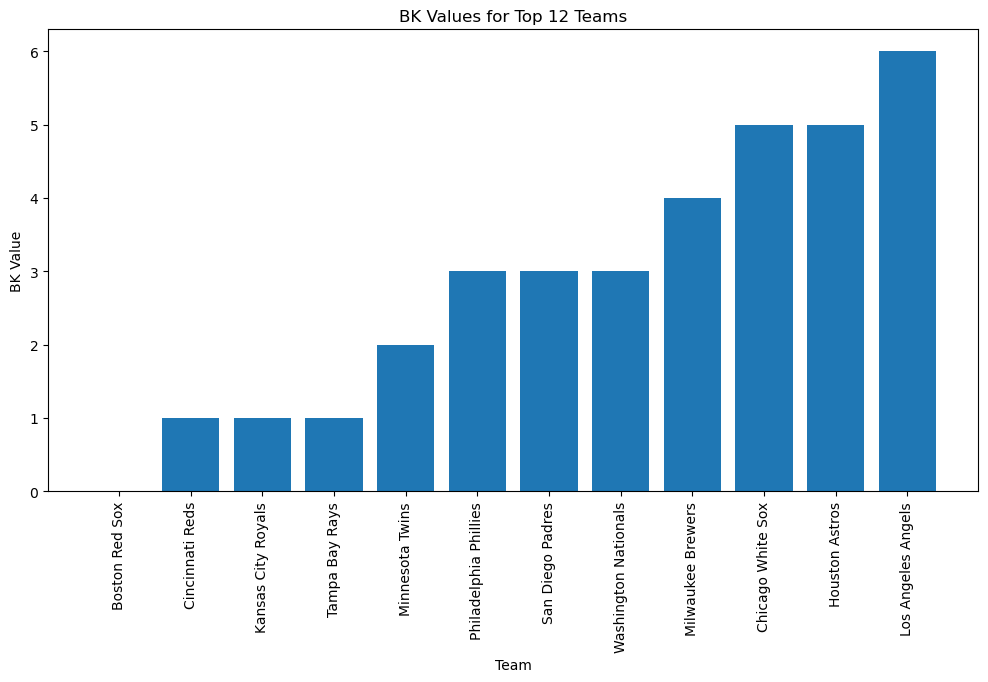

In [19]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Tm'], sorted_df['BK'])
plt.xlabel('Team')
plt.ylabel('BK Value')
plt.title('BK Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [20]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
SB_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['SB']

# Sort the DataFrame by 'BK' values in ascending order
SB_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'SB']].sort_values('SB', ascending=True)
total_SB = SB_values.sum()
# Print the sorted DataFrame
print(SB_sorted_df)
print("Total SB values:", total_SB)

                       Tm  SB
16        Minnesota Twins  34
5       Chicago White Sox  42
10         Houston Astros  46
22       San Diego Padres  56
3          Boston Red Sox  58
12     Los Angeles Angels  59
26         Tampa Bay Rays  63
11     Kansas City Royals  64
20  Philadelphia Phillies  72
15      Milwaukee Brewers  88
6         Cincinnati Reds  96
29   Washington Nationals  98
Total SB values: 776


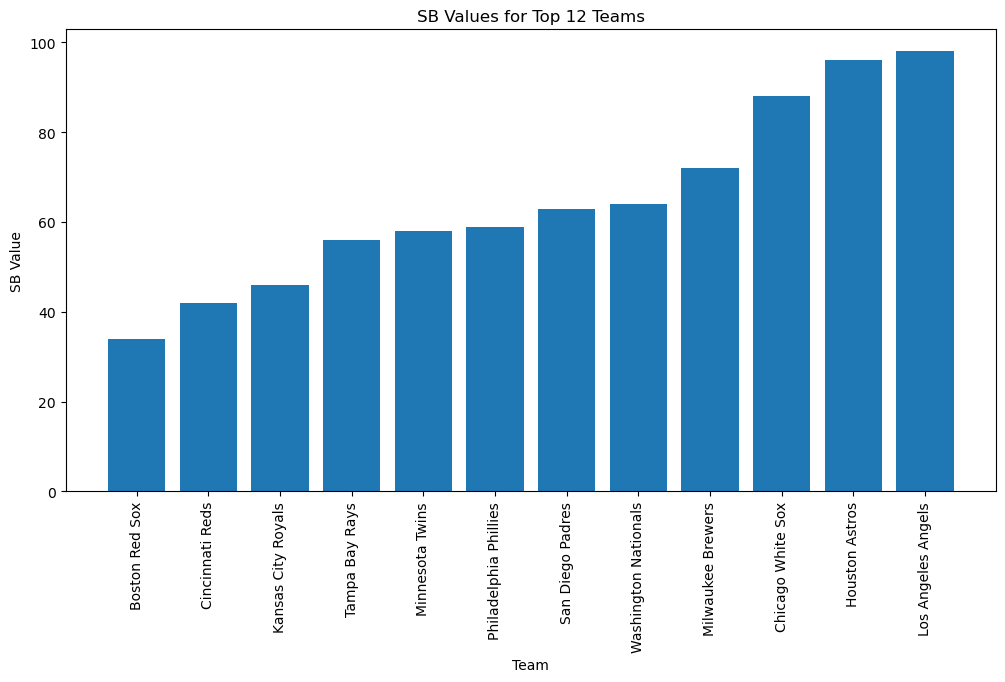

In [21]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Tm'], SB_sorted_df['SB'])
plt.xlabel('Team')
plt.ylabel('SB Value')
plt.title('SB Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [22]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
CG_y_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['CG_y']

# Sort the DataFrame by 'BK' values in ascending order
CG_y_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'CG_y']].sort_values('CG_y', ascending=True)
total_CG_y = CG_y_values.sum()
# Print the sorted DataFrame
print(SB_sorted_df)
print("Total CG_y values:", total_CG_y)

                       Tm  SB
16        Minnesota Twins  34
5       Chicago White Sox  42
10         Houston Astros  46
22       San Diego Padres  56
3          Boston Red Sox  58
12     Los Angeles Angels  59
26         Tampa Bay Rays  63
11     Kansas City Royals  64
20  Philadelphia Phillies  72
15      Milwaukee Brewers  88
6         Cincinnati Reds  96
29   Washington Nationals  98
Total CG_y values: 6


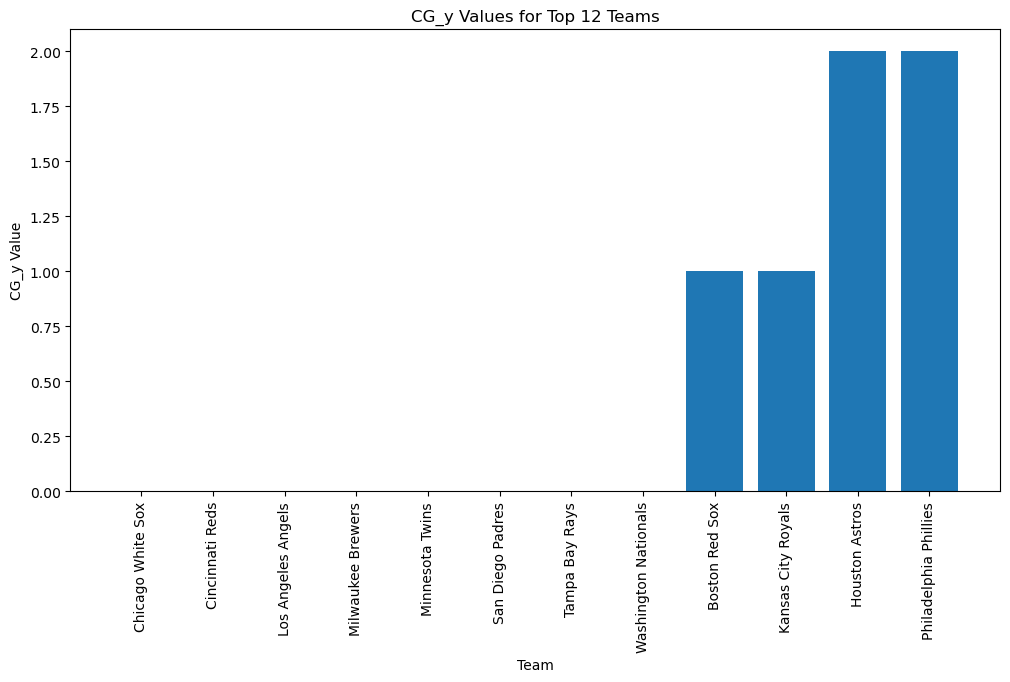

In [23]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(CG_y_sorted_df['Tm'], CG_y_sorted_df['CG_y'])
plt.xlabel('Team')
plt.ylabel('CG_y Value')
plt.title('CG_y Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [24]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "Ch" value
Ch_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['Ch']

# Sort the DataFrame by 'Ch' values in ascending order
Ch_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'Ch']].sort_values('Ch', ascending=True)
total_Ch = Ch_values.sum()
# Print the sorted DataFrame
print(Ch_sorted_df)
print("Total Ch values:", total_Ch)

                       Tm    Ch
16        Minnesota Twins  2264
6         Cincinnati Reds  2284
5       Chicago White Sox  2315
26         Tampa Bay Rays  2322
12     Los Angeles Angels  2341
15      Milwaukee Brewers  2353
29   Washington Nationals  2358
20  Philadelphia Phillies  2396
11     Kansas City Royals  2398
3          Boston Red Sox  2399
10         Houston Astros  2401
22       San Diego Padres  2453
Total Ch values: 28284


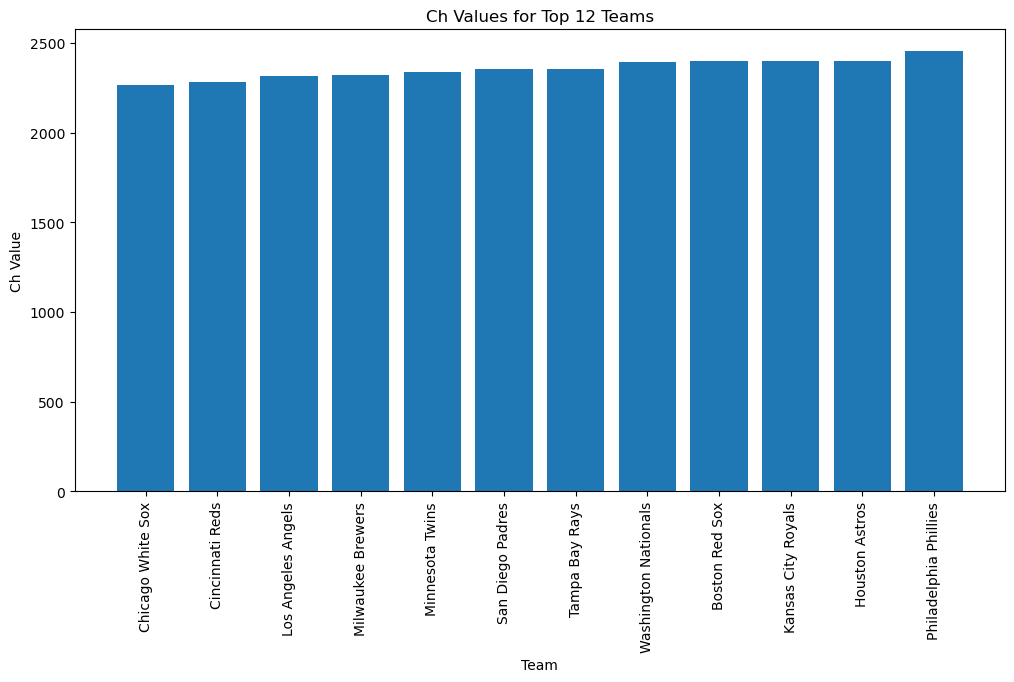

In [25]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(CG_y_sorted_df['Tm'], Ch_sorted_df['Ch'])
plt.xlabel('Team')
plt.ylabel('Ch Value')
plt.title('Ch Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [26]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "GF" value
GF_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['GF']

# Sort the DataFrame by 'GF' values in ascending order
GF_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'GF']].sort_values('GF', ascending=True)
total_GF = GF_values.sum()
# Print the sorted DataFrame
print(GF_sorted_df)
print("Total GF values:", total_GF)

                       Tm  GF
20  Philadelphia Phillies  63
3          Boston Red Sox  65
10         Houston Astros  65
12     Los Angeles Angels  65
29   Washington Nationals  65
6         Cincinnati Reds  66
11     Kansas City Royals  66
15      Milwaukee Brewers  66
16        Minnesota Twins  66
26         Tampa Bay Rays  66
5       Chicago White Sox  67
22       San Diego Padres  70
Total GF values: 790


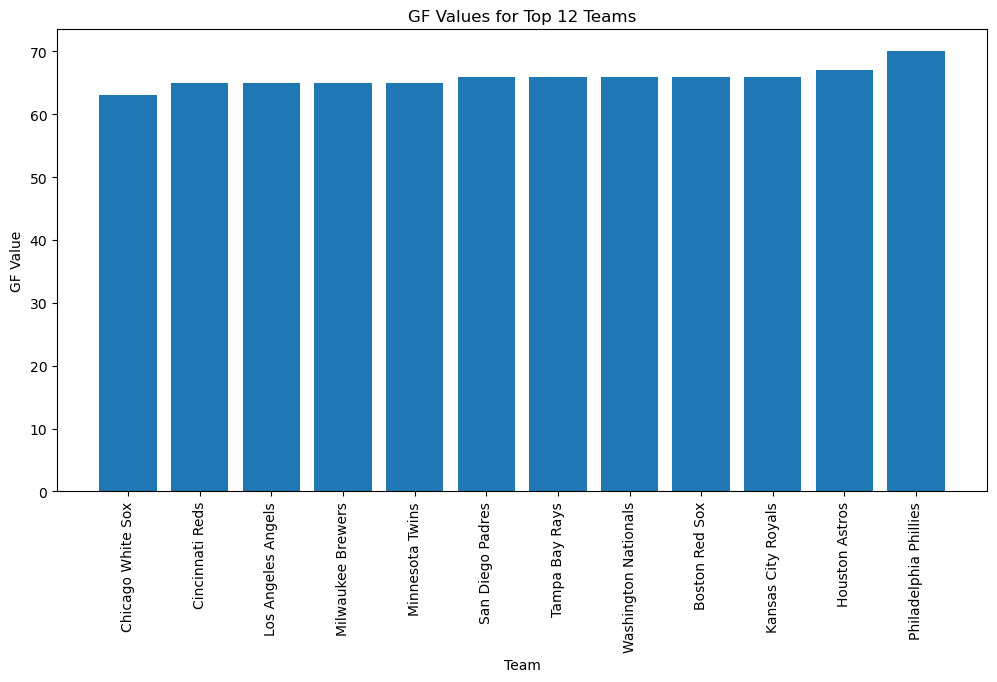

In [27]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(CG_y_sorted_df['Tm'], GF_sorted_df['GF'])
plt.xlabel('Team')
plt.ylabel('GF Value')
plt.title('GF Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [28]:
#top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "cSho" value
cSho_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['cSho']

# Sort the DataFrame by 'cSho' values in ascending order
cSho_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'cSho']].sort_values('cSho', ascending=True)
total_cSho = cSho_values.sum()
# Print the sorted DataFrame
print(cSho_sorted_df)
print("Total cSho values:", total_cSho)

                       Tm  cSho
5       Chicago White Sox     0
6         Cincinnati Reds     0
11     Kansas City Royals     0
12     Los Angeles Angels     0
15      Milwaukee Brewers     0
16        Minnesota Twins     0
22       San Diego Padres     0
26         Tampa Bay Rays     0
29   Washington Nationals     0
3          Boston Red Sox     1
10         Houston Astros     1
20  Philadelphia Phillies     2
Total cSho values: 4


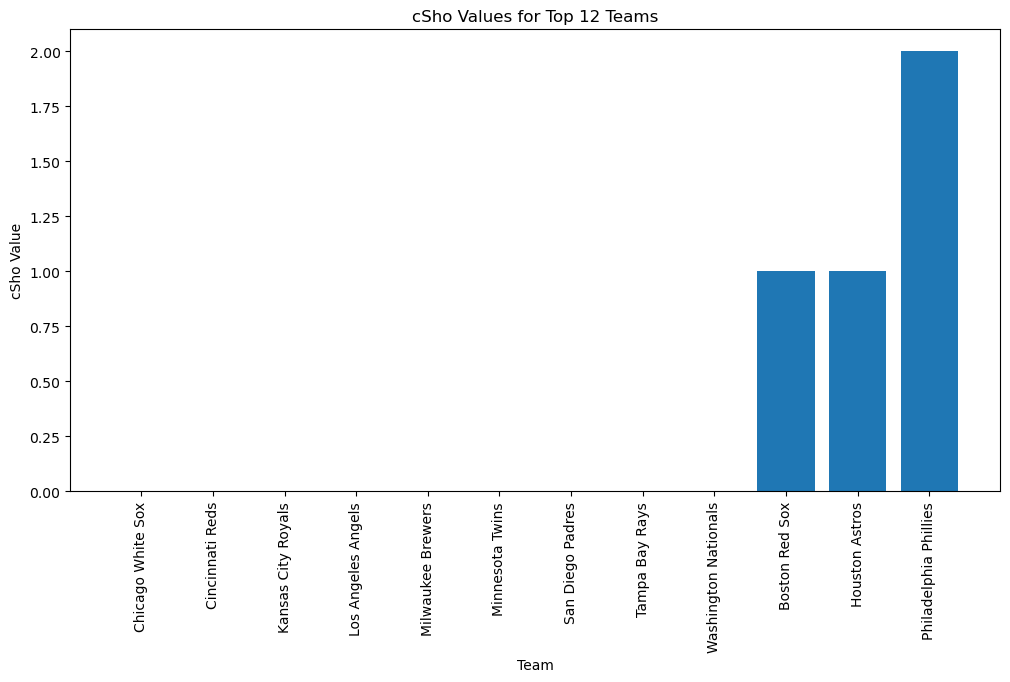

In [29]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(cSho_sorted_df['Tm'], cSho_sorted_df['cSho'])
plt.xlabel('Team')
plt.ylabel('cSho Value')
plt.title('cSho Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

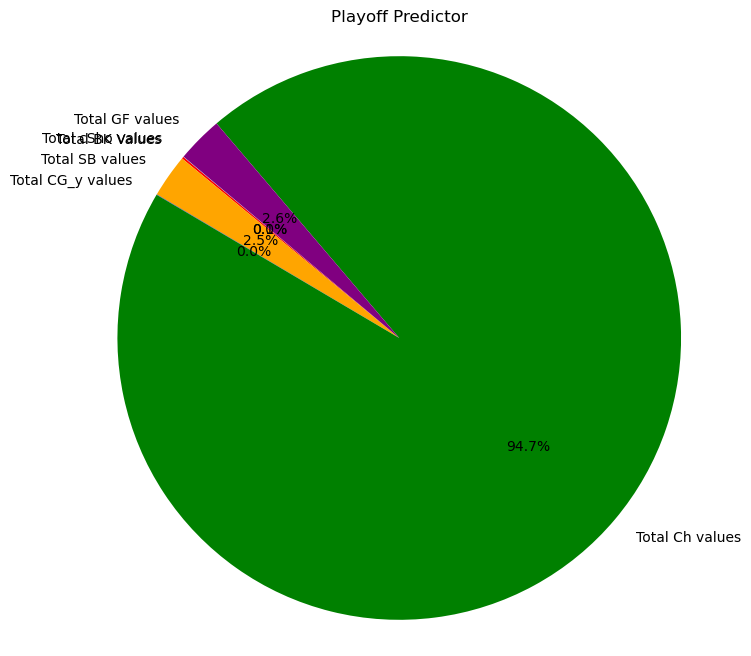

In [30]:
# Given data
total_values = {
    "Total BK Values": 35,
    "Total SB values": 741,
    "Total CG_y values": 6,
    "Total Ch values": 28218,
    "Total GF values": 789,
    "Total cSho values": 4
}

# Define custom labels and colors
labels = total_values.keys()
sizes = total_values.values()
colors = ["red", "orange", "blue", "green", "purple", "lightskyblue"]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Add a title
plt.title("Playoff Predictor")

# Show the pie chart
plt.show()

#BOTTOM 12 TEAMS

In [31]:
# Sort the teams based on prediction counts in descending order
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Select the bottom 12 teams
bottom_12_teams = sorted_predictions[18:30]

# Print or use the bottom 12 teams
#print(bottom_12_teams)
bottom_12_teams

[('Arizona Diamondbacks', 0),
 ('Atlanta Braves', 0),
 ('Baltimore Orioles', 0),
 ('Detroit Tigers', 0),
 ('Los Angeles Dodgers', 0),
 ('Miami Marlins', 0),
 ('New York Mets', 0),
 ('Oakland Athletics', 0),
 ('San Francisco Giants', 0),
 ('Seattle Mariners', 0),
 ('St. Louis Cardinals', 0),
 ('Texas Rangers', 0)]

In [32]:
# Assuming top_12_teams contains the team names of the top 12 teams
bottom_12_teams_names = [team[0] for team in bottom_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
bk_values = df_2024[df_2024['Tm'].isin(bottom_12_teams_names)]['BK']

# Sort the DataFrame by 'BK' values in ascending order
sorted_df = df_2024[df_2024['Tm'].isin(bottom_12_teams_names)][['Tm', 'BK']].sort_values('BK', ascending=True)
total_bk = bk_values.sum()
# Print the sorted DataFrame
print(sorted_df)
print("Total BK values:", total_bk)

                      Tm  BK
25   St. Louis Cardinals   1
1         Atlanta Braves   2
2      Baltimore Orioles   2
13   Los Angeles Dodgers   2
23      Seattle Mariners   2
27         Texas Rangers   2
0   Arizona Diamondbacks   3
9         Detroit Tigers   3
14         Miami Marlins   3
24  San Francisco Giants   3
17         New York Mets   4
19     Oakland Athletics   5
Total BK values: 32


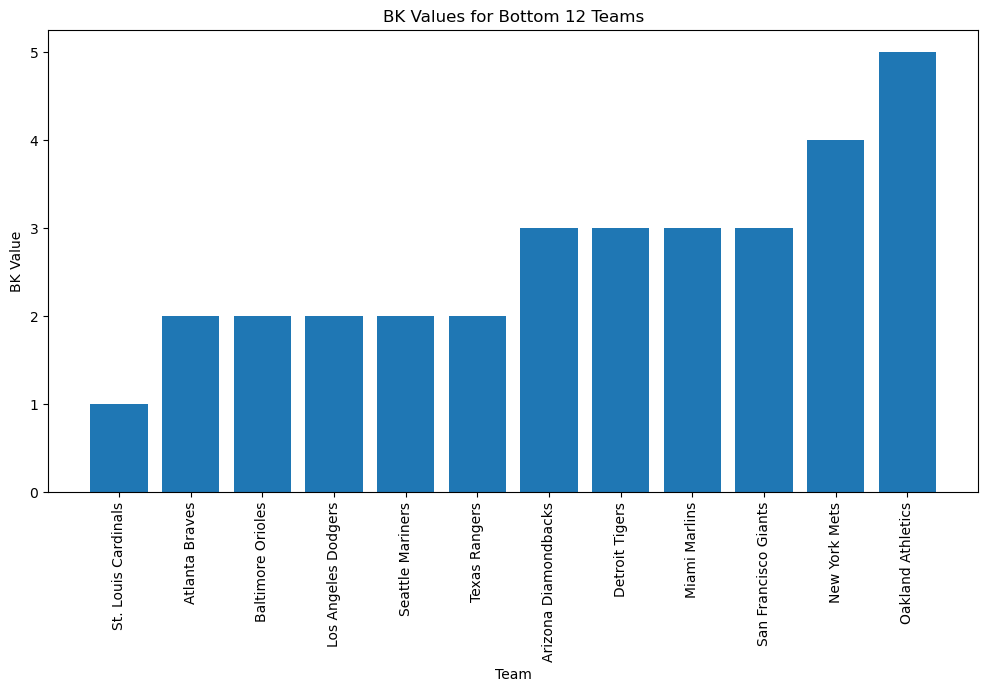

In [33]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Tm'], sorted_df['BK'])
plt.xlabel('Team')
plt.ylabel('BK Value')
plt.title('BK Values for Bottom 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Assuming bottom_12_teams contains the team names of the bottom 12 teams
bottom_12_teams_names = [team[0] for team in bottom_12_teams]

# Filter the df_2024 DataFrame for the bottom 12 teams and retrieve the "BK" value
SB_values = df_2024[df_2024['Tm'].isin(bottom_12_teams_names)]['SB']

# Sort the DataFrame by 'BK' values in ascending order
SB_sorted_df = df_2024[df_2024['Tm'].isin(bottom_12_teams_names)][['Tm', 'SB']].sort_values('SB', ascending=True)
total_SB = SB_values.sum()
# Print the sorted DataFrame
print(SB_sorted_df)
print("Total SB values:", total_SB)

                      Tm  SB
24  San Francisco Giants  21
9         Detroit Tigers  26
1         Atlanta Braves  29
27         Texas Rangers  30
25   St. Louis Cardinals  31
19     Oakland Athletics  34
14         Miami Marlins  35
0   Arizona Diamondbacks  37
13   Los Angeles Dodgers  43
23      Seattle Mariners  43
17         New York Mets  46
2      Baltimore Orioles  47
Total SB values: 422


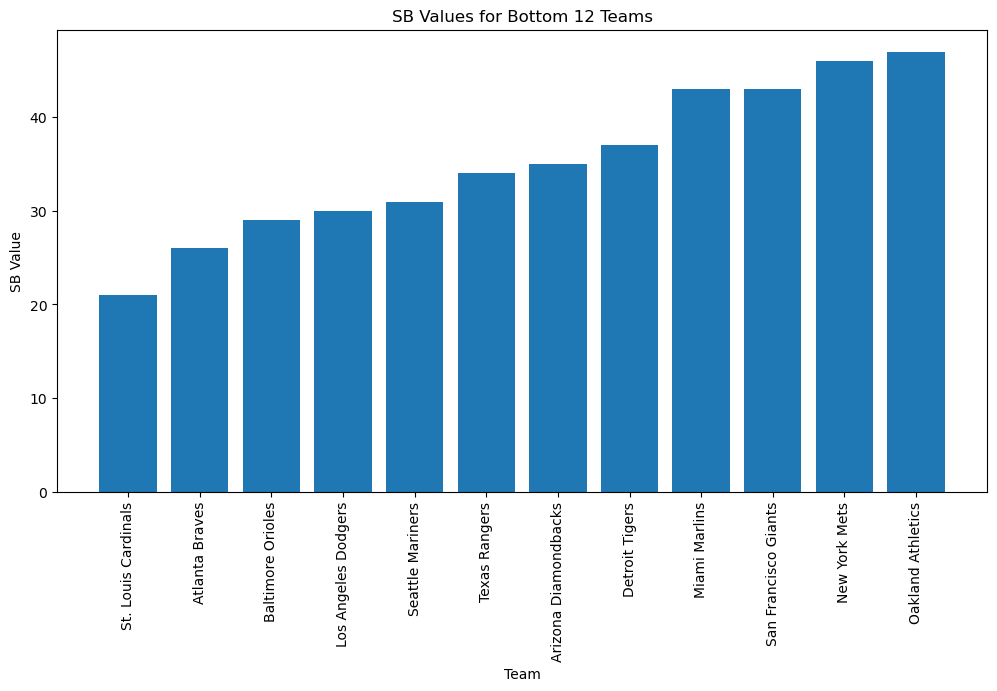

In [35]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Tm'], SB_sorted_df['SB'])
plt.xlabel('Team')
plt.ylabel('SB Value')
plt.title('SB Values for Bottom 12 Teams')
plt.xticks(rotation=90)
plt.show()